<a href="https://colab.research.google.com/github/RISHA-2802/BDA/blob/main/BDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving large_sales_data.csv to large_sales_data.csv
MEAN:
Sales       4976.694000
Profit       995.721667
Quantity      24.783667
dtype: float64 

MEDIAN:
Sales       4931.5
Profit       953.5
Quantity      25.0
dtype: float64 

MODE:
Sales       989.0
Profit      126.0
Quantity     15.0
Name: 0, dtype: float64 

STANDARD DEVIATION:
Sales       2862.260740
Profit      1144.578872
Quantity      14.093252
dtype: float64 

VARIANCE:
Sales       8.192537e+06
Profit      1.310061e+06
Quantity    1.986197e+02
dtype: float64 

MISSING VALUES:
OrderID         0
Date            0
Region          0
Category        0
SubCategory     0
Sales           0
Profit          0
Quantity        0
CustomerType    0
PaymentMode     0
dtype: int64


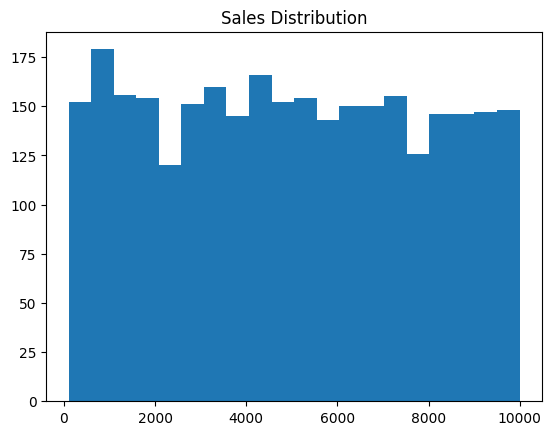

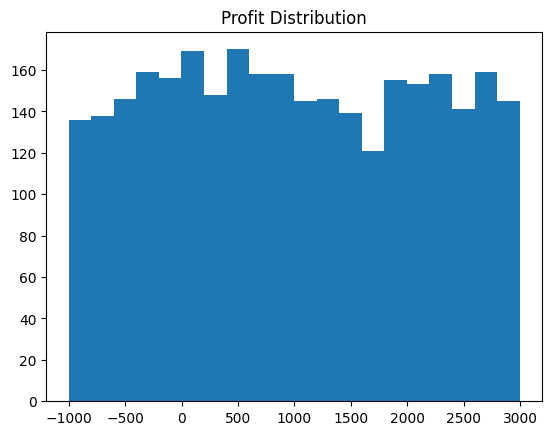

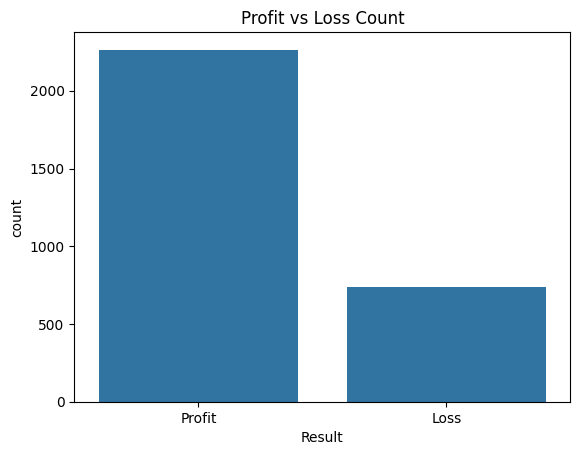

In [ ]:
    from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload dataset
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# MEAN
print("MEAN:")
print(df[['Sales','Profit','Quantity']].mean(), "\n")

# MEDIAN
print("MEDIAN:")
print(df[['Sales','Profit','Quantity']].median(), "\n")

# MODE
print("MODE:")
print(df[['Sales','Profit','Quantity']].mode().iloc[0], "\n")

# STANDARD DEVIATION
print("STANDARD DEVIATION:")
print(df[['Sales','Profit','Quantity']].std(), "\n")

# VARIANCE
print("VARIANCE:")
print(df[['Sales','Profit','Quantity']].var(), "\n")

# MISSING VALUES
print("MISSING VALUES:")
print(df.isnull().sum())

# VISUALIZATIONS
plt.hist(df['Sales'], bins=20)
plt.title("Sales Distribution")
plt.show()

plt.hist(df['Profit'], bins=20)
plt.title("Profit Distribution")
plt.show()

df['Result'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else 'Loss')
sns.countplot(x='Result', data=df)
plt.title("Profit vs Loss Count")
plt.show()

Saving large_sales_data.csv to large_sales_data (1).csv
MONTH-WISE SALES & PROFIT
           Sales  Profit
Month                   
2024-01  3707482  763909
2024-02  3487176  689548
2024-03  3614820  701993
2024-04  3650140  730799
2024-05   470464  100916


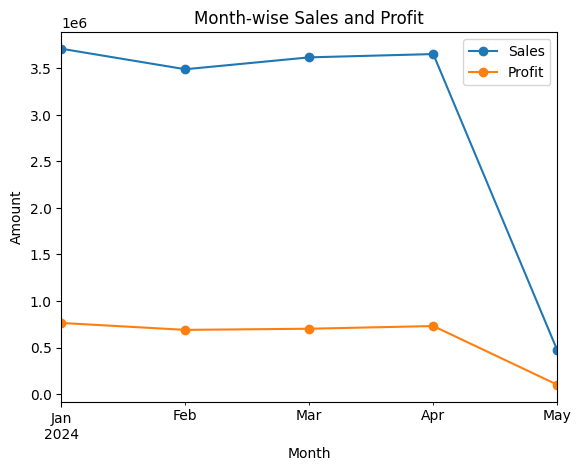


REGION-WISE PROFIT
Region
Central    601881
East       600722
North      609495
South      582218
West       592849
Name: Profit, dtype: int64


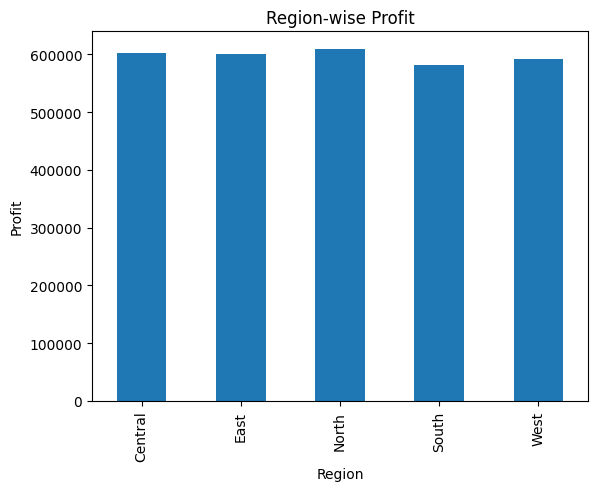


CATEGORY-WISE PROFIT
Category
Books          587500
Clothing       637215
Electronics    587155
Food           613939
Furniture      561356
Name: Profit, dtype: int64


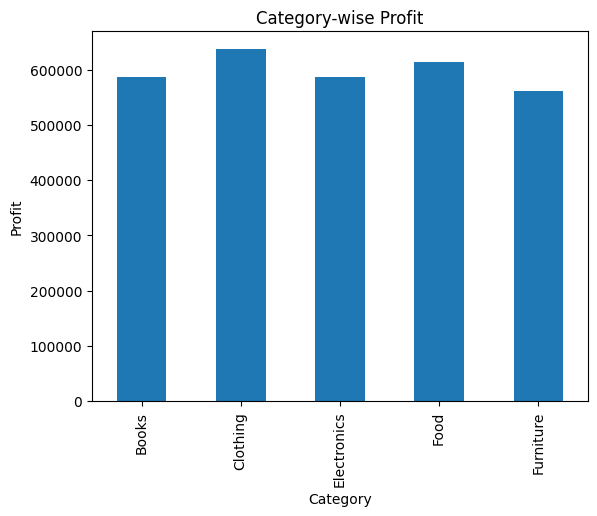


CORRELATION MATRIX
             Sales    Profit  Quantity
Sales     1.000000  0.032133 -0.006022
Profit    0.032133  1.000000  0.019923
Quantity -0.006022  0.019923  1.000000


In [ ]:
# DIAGNOSTIC DATA ANALYTICS USING PYTHON

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload dataset
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month
df['Month'] = df['Date'].dt.to_period('M')


# Month-wise Sales & Profit

month_summary = df.groupby('Month')[['Sales','Profit']].sum()
print("MONTH-WISE SALES & PROFIT")
print(month_summary)

month_summary.plot(marker='o')
plt.title("Month-wise Sales and Profit")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.show()


#  Region-wise Profit

region_profit = df.groupby('Region')['Profit'].sum()
print("\nREGION-WISE PROFIT")
print(region_profit)

region_profit.plot(kind='bar')
plt.title("Region-wise Profit")
plt.ylabel("Profit")
plt.show()


# Category-wise Profit

category_profit = df.groupby('Category')['Profit'].sum()
print("\nCATEGORY-WISE PROFIT")
print(category_profit)

category_profit.plot(kind='bar')
plt.title("Category-wise Profit")
plt.ylabel("Profit")
plt.show()

#  Correlation Analysis (WHY?)

print("\nCORRELATION MATRIX")
print(df[['Sales','Profit','Quantity']].corr())

In [ ]:
from google.colab import files
import pandas as pd

# Upload dataset
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month
df['Month'] = df['Date'].dt.to_period('M')

# Calculate month-wise total profit
monthly_profit = df.groupby('Month')['Profit'].sum().reset_index()

# Get previous month profit
monthly_profit['Prev_Month_Profit'] = monthly_profit['Profit'].shift(1)

# Predict Profit or Loss for next month
def predict_next(row):
    if pd.isna(row['Prev_Month_Profit']):
        return "No Previous Data"
    elif row['Profit'] >= row['Prev_Month_Profit']:
        return "Likely Profit Next Month"
    else:
        return "Likely Loss Next Month"

monthly_profit['Prediction'] = monthly_profit.apply(predict_next, axis=1)

print("MONTH-WISE PROFIT WITH PREDICTION")
print(monthly_profit)

Saving large_sales_data.csv to large_sales_data.csv
MONTH-WISE PROFIT WITH PREDICTION
     Month  Profit  Prev_Month_Profit                Prediction
0  2024-01  763909                NaN          No Previous Data
1  2024-02  689548           763909.0    Likely Loss Next Month
2  2024-03  701993           689548.0  Likely Profit Next Month
3  2024-04  730799           701993.0  Likely Profit Next Month
4  2024-05  100916           730799.0    Likely Loss Next Month
